In [7]:
# !pip install pyreadr
! pip install --upgrade networkx matplotlib
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.7 MB/s eta 0:00:0031m14.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=5458d4b6e207f5ed0d8d489ed05129ff0ada6997f2b383751db705727d67529a
  Stored in directory: /Users/keitabroadwater/Library/Caches/pip/wheels/01/02/ee/df0699282986903a384b69aab4413af9efd26b3612b5dccc9e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha256=2112646d024c9378a5420ef3cf11f069df0fe3afa82ca965022d9d9cfa4110d0
  Stored in directory: /Users/keitabroadwater/Library/Caches/pip/wheels/43/aa/48/5c66b931ff013ad19774081aa19656637af5c0cc33b5494b30
Successfully built fst-pso miniful
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully 

In [ ]:
import pyreadr


In [ ]:
result = pyreadr.read_r('/Users/keitabroadwater/Documents/jazz.rda')


In [ ]:
import bz2

# Replace 'path_to_file.bz2' with the actual path to your .bz2 file
with bz2.open('/Users/keitabroadwater/Documents/polbooks.graph.bz2', 'rt') as f:  # 'rt' indicates read in text mode
    content = f.read()

    # Do something with the content
    print(content)


In [ ]:
pip install networkx


In [106]:
import networkx as nx
import matplotlib.pyplot as plt


# Load the GML file
gml_graph = nx.read_gml('/Users/keitabroadwater/Documents/polbooks/polbooks.gml')

# Now you can work with the graph object
print(len(graph.nodes), len(graph.edges))
print(graph.nodes(data=True))  # Print nodes with their attributes
print(graph.edges(data=True))  # Print edges with their attributes


105 441
[('1000 Years for Revenge', {'value': 'n'}), ('Bush vs. the Beltway', {'value': 'c'}), ("Charlie Wilson's War", {'value': 'c'}), ('Losing Bin Laden', {'value': 'c'}), ('Sleeping With the Devil', {'value': 'n'}), ('The Man Who Warned America', {'value': 'c'}), ('Why America Slept', {'value': 'n'}), ('Ghost Wars', {'value': 'n'}), ('A National Party No More', {'value': 'c'}), ('Bush Country', {'value': 'c'}), ('Dereliction of Duty', {'value': 'c'}), ('Legacy', {'value': 'c'}), ('Off with Their Heads', {'value': 'c'}), ('Persecution', {'value': 'c'}), ("Rumsfeld's War", {'value': 'c'}), ('Breakdown', {'value': 'c'}), ('Betrayal', {'value': 'c'}), ('Shut Up and Sing', {'value': 'c'}), ('Meant To Be', {'value': 'n'}), ('The Right Man', {'value': 'c'}), ('Ten Minutes from Normal', {'value': 'c'}), ("Hillary's Scheme", {'value': 'c'}), ('The French Betrayal of America', {'value': 'c'}), ('Tales from the Left Coast', {'value': 'c'}), ('Hating America', {'value': 'c'}), ('The Third Terr

In [ ]:
# # Draw the graph
# nx.draw(graph, with_labels=True, node_size=700, node_color="lightblue", font_size=10)

# # Show the plot
# plt.show()

In [2]:
# # import networkx as nx

# # Load the GML file into a graph
# gml_graph = nx.read_gml('/Users/keitabroadwater/Documents/polbooks/polbooks.gml')


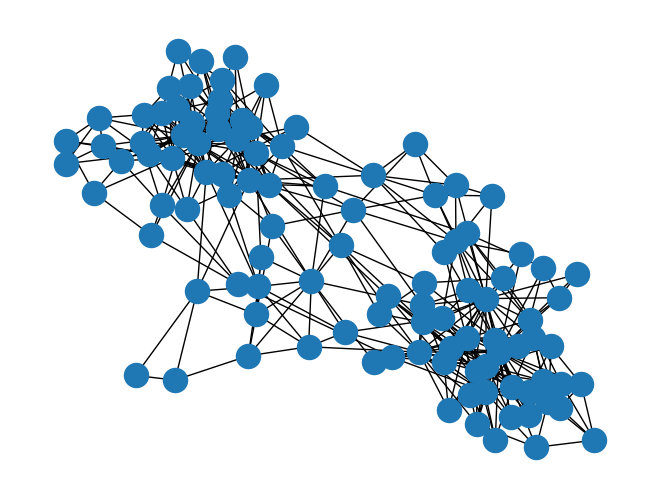

In [3]:
# import matplotlib.pyplot as plt

# # Draw the graph
# nx.draw(gml_graph)

# # Show the plot
# plt.show()


In [17]:
# pos = nx.spring_layout(gml_graph)  # positions for all nodes

# # Nodes
# nx.draw_networkx_nodes(gml_graph, pos, node_size=700, node_color="lightblue")

# # Edges
# nx.draw_networkx_edges(gml_graph, pos, width=1.0, alpha=0.5)

# # Labels
# nx.draw_networkx_labels(gml_graph, pos, font_size=10)

# plt.show()

In [16]:
# # Assuming 'gml_graph' is your graph object
# color_map = {'l': 'blue', 'c': 'red', 'n': 'grey'}  # Define your attribute-to-color mapping

# # Generate a list of colors for each node based on the 'value' attribute
# node_colors = [color_map[gml_graph.nodes[node]['value']] for node in gml_graph.nodes()]

# # Draw the graph with the specified node colors
# nx.draw(gml_graph, node_color=node_colors, with_labels=True, node_size=500)

# # Display the plot
# plt.show()

In [ ]:
# Draw the graph with the specified node colors
nx.draw(gml_graph, node_color=node_colors, with_labels=True, node_size=500)

# Display the plot
plt.show()

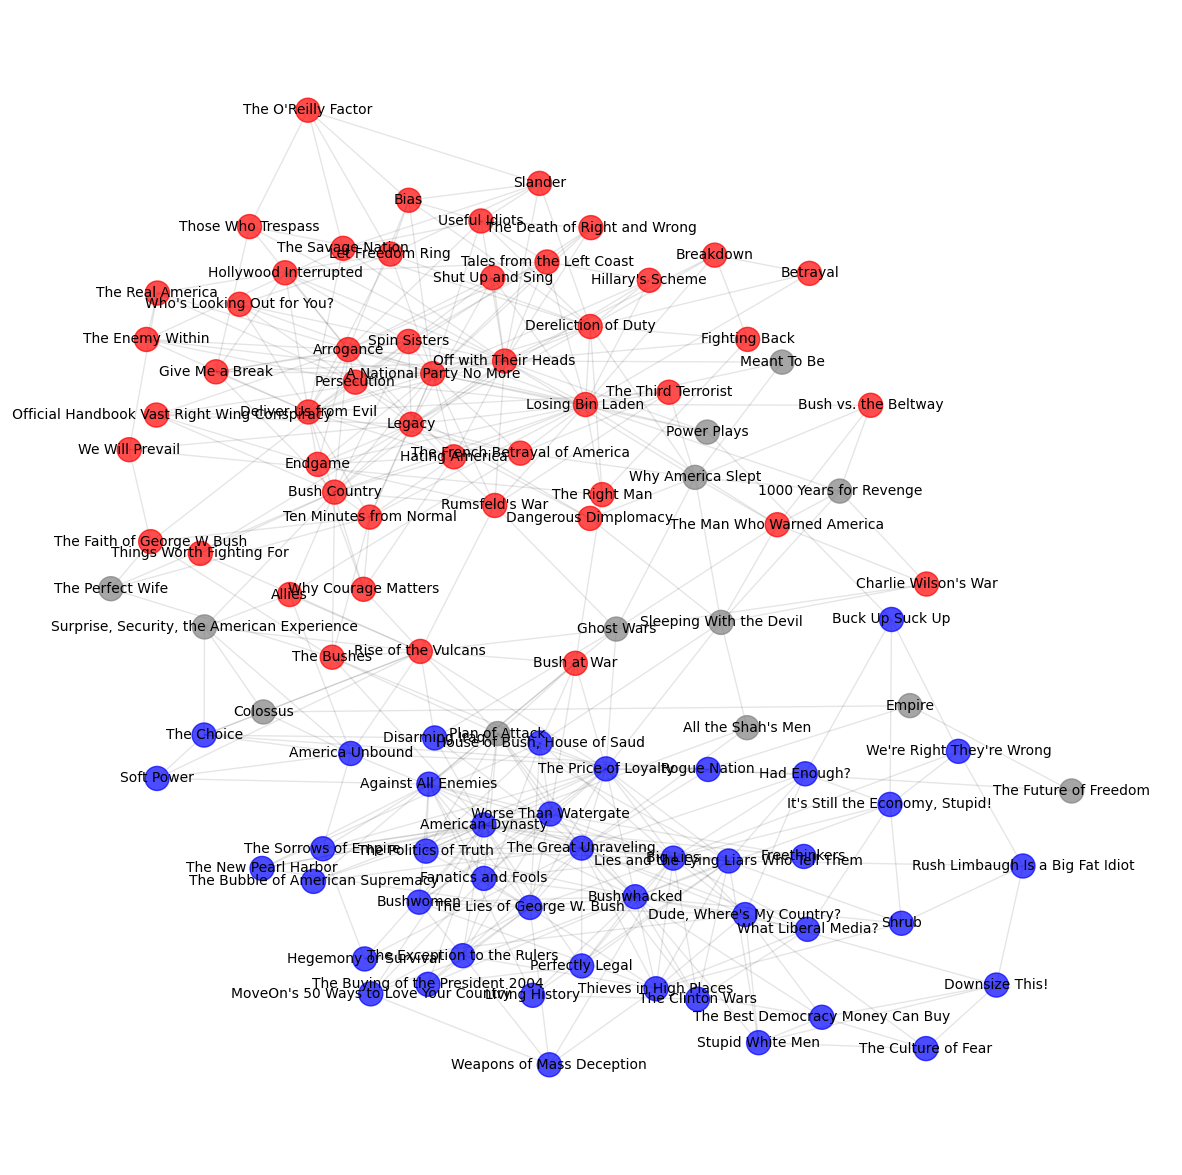

In [18]:
# import matplotlib.pyplot as plt
# import networkx as nx

# Increase figure size
plt.figure(figsize=(15, 15))

# Change layout
pos = nx.kamada_kawai_layout(gml_graph)

# Adjust node size (optional, if you have a measure like degree to scale by)
# node_sizes = [gml_graph.degree[node] * 100 for node in gml_graph.nodes()]

# Adjust font size
font_sizes = 10  # or any other size

# Define your color mapping
color_map = {'l': 'blue', 'c': 'red', 'n': 'grey'}
node_colors = [color_map[gml_graph.nodes[node]['value']] for node in gml_graph.nodes()]

# Draw nodes
nx.draw_networkx_nodes(gml_graph, pos, node_color=node_colors, alpha=0.7)

# Draw edges with transparency
nx.draw_networkx_edges(gml_graph, pos, alpha=0.1)

# Draw labels with font size
nx.draw_networkx_labels(gml_graph, pos, font_size=font_sizes)

# Remove the axes
plt.axis('off')

# Show the plot
plt.show()


Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 199.33it/s]


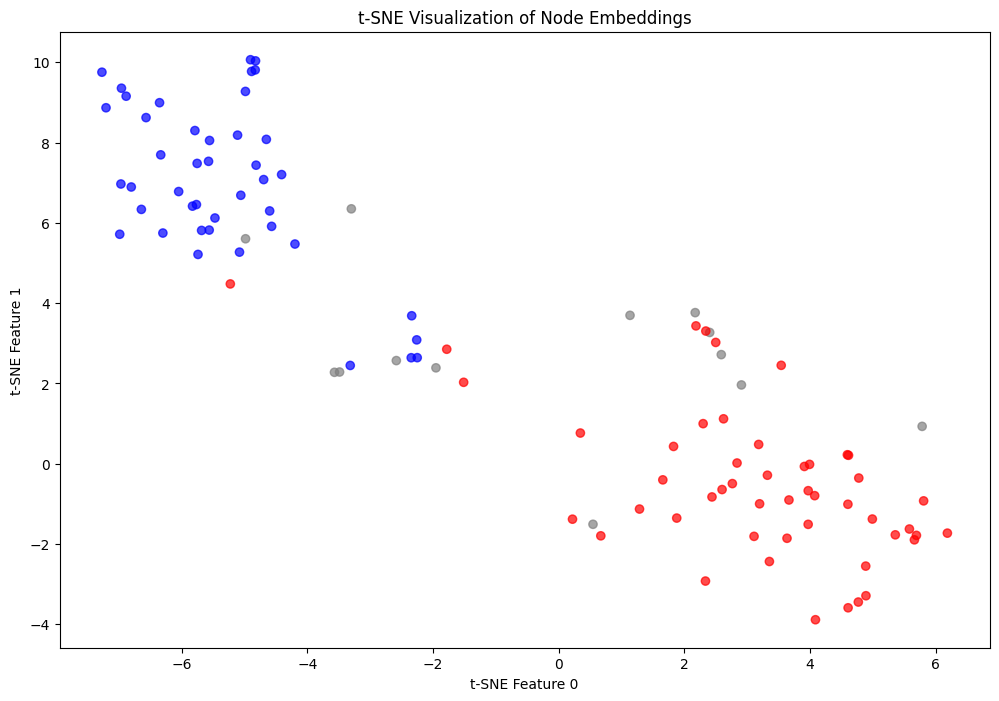

In [26]:
from node2vec import Node2Vec
import networkx as nx
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'gml_graph' is your loaded graph from the GML file
node2vec = Node2Vec(gml_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Extract node embeddings into a dictionary
embeddings = {str(node): model.wv[str(node)] for node in gml_graph.nodes()}

# Prepare a color map and the colors for each node
color_map = {'l': 'blue', 'c': 'red', 'n': 'grey'}
node_colors = [color_map[gml_graph.nodes[node]['value']] for node in gml_graph.nodes()]

# Transform the embeddings into a list of vectors for t-SNE
node_embeddings = [embeddings[str(node)] for node in gml_graph.nodes()]
node_embeddings_array = np.array(node_embeddings)  # Convert list to NumPy array

# Initialize and fit t-SNE
tsne_model = TSNE(n_components=2, learning_rate='auto', init='random')
tsne_features = tsne_model.fit_transform(node_embeddings_array)

# Plot the nodes with t-SNE embeddings and color by their 'value'
plt.figure(figsize=(12, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], color=node_colors, alpha=0.7)

# Optionally, add labels for each point
#for i, node in enumerate(gml_graph.nodes()):
#    plt.annotate(node, (tsne_features[i, 0], tsne_features[i, 1]))

plt.xlabel('t-SNE Feature 0')
plt.ylabel('t-SNE Feature 1')
plt.title('t-SNE Visualization of Node Embeddings')
plt.show()


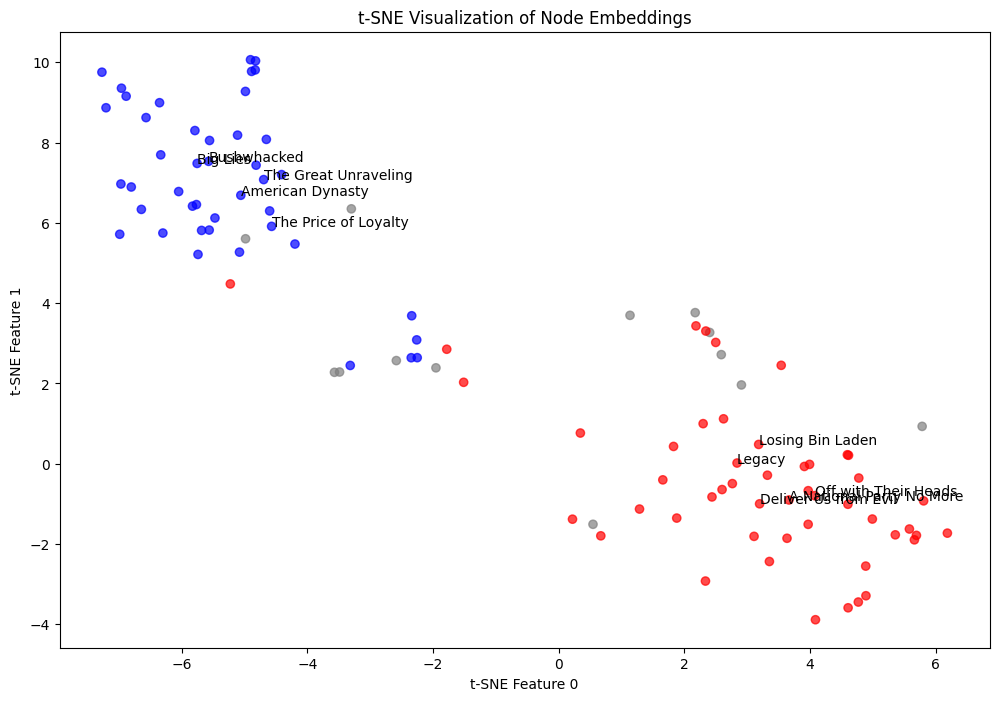

In [191]:


# Assuming tsne_features are the t-SNE 2D embeddings from your previous code
# and gml_graph is your graph object with nodes that have titles as names

# Calculate degrees of nodes and sort them
degrees = dict(gml_graph.degree())
sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)

# Decide how many nodes you want to label
num_labels = 10  # for example, you want to label the top 10 nodes by degree

# Plotting the nodes
plt.figure(figsize=(12, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], color=node_colors, alpha=0.7)

# Adding labels to the chosen nodes
for i, node in enumerate(sorted_nodes[:num_labels]):
    # Find the index of the node to get its t-SNE coordinates
    node_index = list(gml_graph.nodes()).index(node)
    plt.annotate(node, (tsne_features[node_index, 0], tsne_features[node_index, 1]))

plt.xlabel('t-SNE Feature 0')
plt.ylabel('t-SNE Feature 1')
plt.title('t-SNE Visualization of Node Embeddings')
plt.show()


Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 200.00it/s]


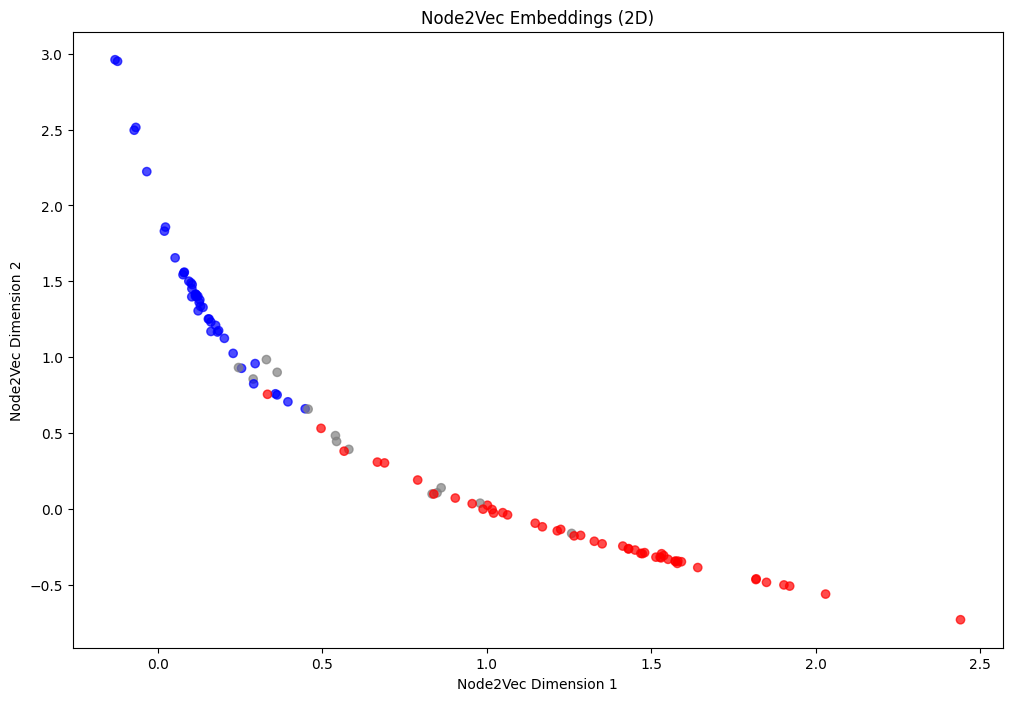

In [20]:
# from node2vec import Node2Vec
# import networkx as nx
# import matplotlib.pyplot as plt

# Assuming 'gml_graph' is your loaded graph from the GML file
# Set dimensions to 2 for direct plotting
node2vec = Node2Vec(gml_graph, dimensions=2, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Extract 2D embeddings into a dictionary
embeddings_2d = {str(node): model.wv[str(node)] for node in gml_graph.nodes()}

# Prepare a color map and the colors for each node based on their 'value'
color_map = {'l': 'blue', 'c': 'red', 'n': 'grey'}
node_colors = [color_map[gml_graph.nodes[node]['value']] for node in gml_graph.nodes()]

# Prepare the 2D points for plotting
points = np.array([embeddings_2d[node] for node in gml_graph.nodes()])

# Plot the nodes with their 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(points[:, 0], points[:, 1], color=node_colors, alpha=0.7)

# Optionally, you can label the points
# for i, node in enumerate(gml_graph.nodes()):
#     plt.annotate(node, (points[i, 0], points[i, 1]), fontsize=9)

plt.xlabel('Node2Vec Dimension 1')
plt.ylabel('Node2Vec Dimension 2')
plt.title('Node2Vec Embeddings (2D)')
plt.show()


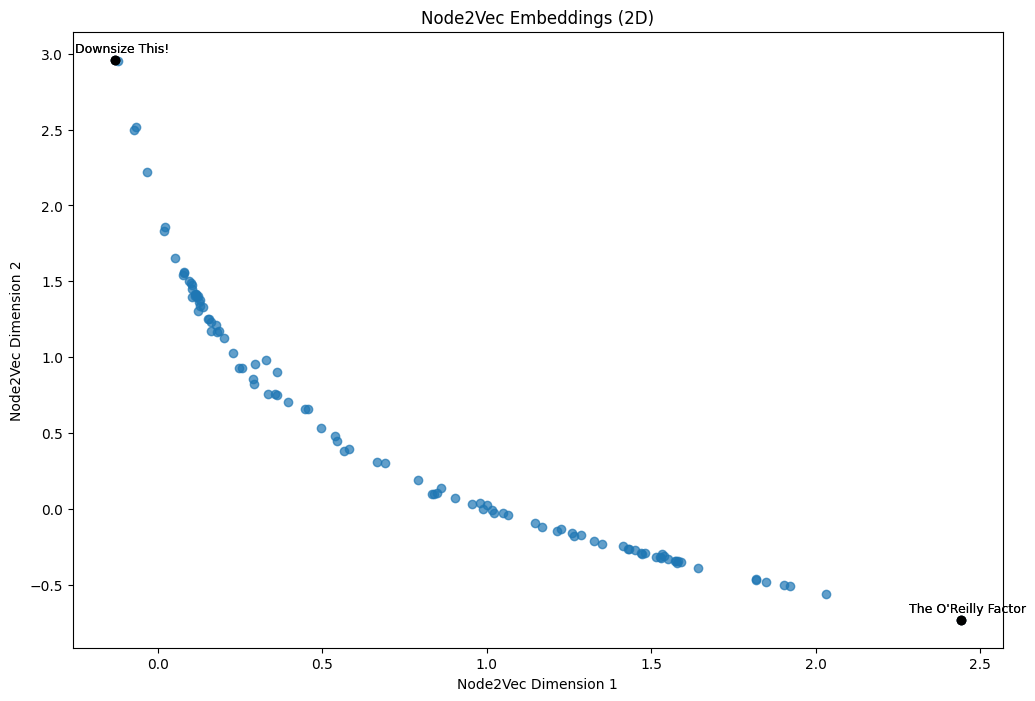

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt

# Let's assume `points` is the numpy array with your Node2Vec 2D points
# and `gml_graph` is your original graph with node labels.

# Identify extreme points
extreme_indices = {
    'leftmost': np.argmin(points[:, 0]),
    'rightmost': np.argmax(points[:, 0]),
    'topmost': np.argmax(points[:, 1]),
    'bottommost': np.argmin(points[:, 1])
}

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Scatter plot of all points
plt.scatter(points[:, 0], points[:, 1], alpha=0.7)

# Get the node labels from your graph
node_labels = list(gml_graph.nodes())

# Annotate the extreme points
for key, index in extreme_indices.items():
    node_label = node_labels[index]
    x, y = points[index]
    plt.scatter(x, y, color='black')  # Mark the extreme point
    plt.annotate(node_label, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9)

plt.xlabel('Node2Vec Dimension 1')
plt.ylabel('Node2Vec Dimension 2')
plt.title('Node2Vec Embeddings (2D)')
plt.show()


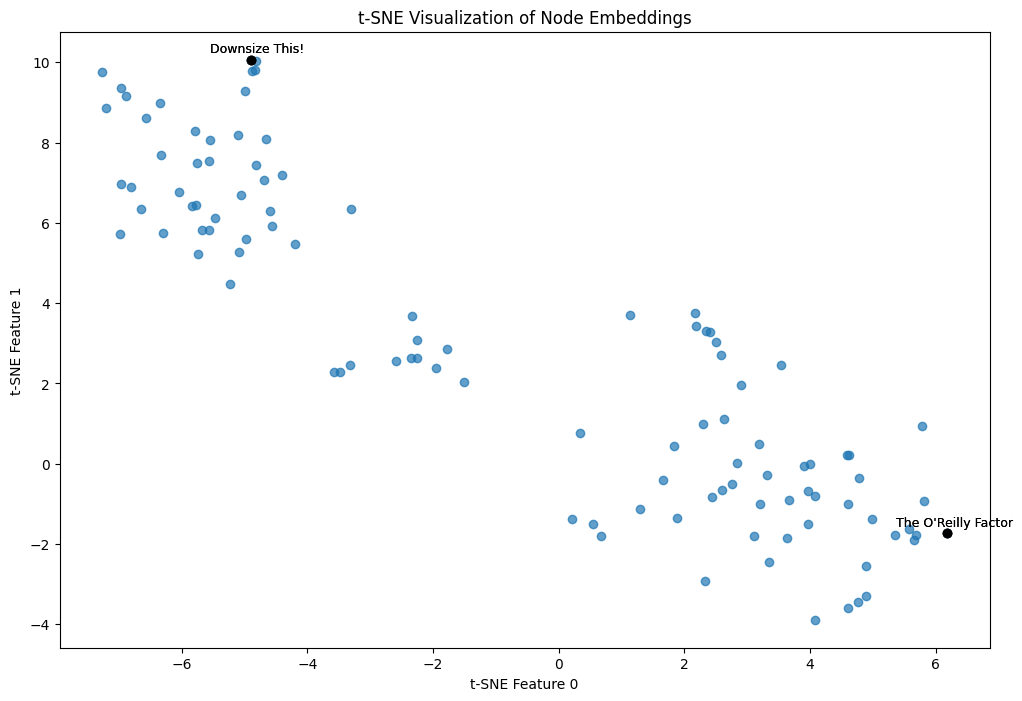

In [190]:
# import numpy as np
# import matplotlib.pyplot as plt

# Assuming `points` contains your Node2Vec 2D points
# and `tsne_features` contains your t-SNE 2D points
# and they are aligned with the nodes in `gml_graph`

# Identify extreme points in Node2Vec space
extreme_indices = {
    'leftmost': np.argmin(points[:, 0]),
    'rightmost': np.argmax(points[:, 0]),
    'topmost': np.argmax(points[:, 1]),
    'bottommost': np.argmin(points[:, 1])
}

# Assuming `tsne_features` is already computed and ready to be plotted
plt.figure(figsize=(12, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], alpha=0.7)

# Get the node labels from your graph
node_labels = list(gml_graph.nodes())

# Annotate the extreme points on the t-SNE plot
for position, index in extreme_indices.items():
    label = node_labels[index]  # Label of the extreme point
    x, y = tsne_features[index]  # Coordinates of the extreme point in t-SNE space
    plt.scatter(x, y, color='black')  # Highlight the extreme point
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9)

plt.xlabel('t-SNE Feature 0')
plt.ylabel('t-SNE Feature 1')
plt.title('t-SNE Visualization of Node Embeddings')
plt.show()


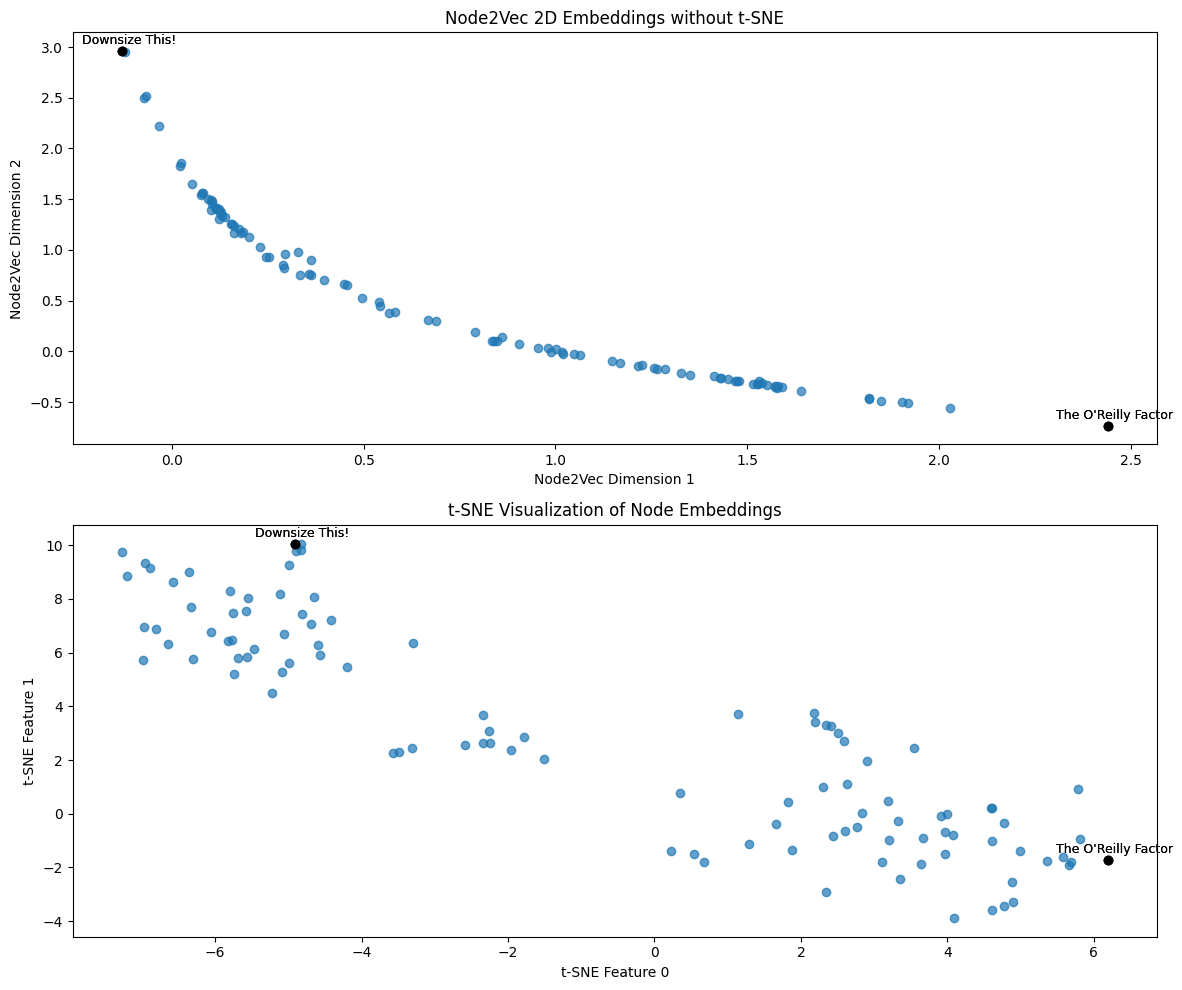

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `points` contains your Node2Vec 2D points
# `tsne_features` contains your t-SNE 2D points
# and they are aligned with the nodes in `gml_graph`

# Identify extreme points in Node2Vec space
extreme_indices = {
    'leftmost': np.argmin(points[:, 0]),
    'rightmost': np.argmax(points[:, 0]),
    'topmost': np.argmax(points[:, 1]),
    'bottommost': np.argmin(points[:, 1])
}

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  # 2 rows, 1 column

# Plot t-SNE Embeddings in the second subplot
axs[1].scatter(tsne_features[:, 0], tsne_features[:, 1], alpha=0.7)
for position, index in extreme_indices.items():
    label = node_labels[index]
    x, y = tsne_features[index]
    axs[1].scatter(x, y, color='black')
    axs[1].annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9)
axs[1].set_title('t-SNE Visualization of Node Embeddings')
axs[1].set_xlabel('t-SNE Feature 0')
axs[1].set_ylabel('t-SNE Feature 1')

# Plot Node2Vec Embeddings in the first subplot
axs[0].scatter(points[:, 0], points[:, 1], alpha=0.7)
for position, index in extreme_indices.items():
    label = node_labels[index]
    x, y = points[index]
    axs[0].scatter(x, y, color='black')
    axs[0].annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9)
axs[0].set_title('Node2Vec 2D Embeddings without t-SNE')
axs[0].set_xlabel('Node2Vec Dimension 1')
axs[0].set_ylabel('Node2Vec Dimension 2')



# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [27]:
node_embedding = model.wv['Losing Bin Laden']  
print(node_embedding)  

[-0.28512368 -0.28379866  0.07767913 -0.07288406 -0.24679649 -0.3374484
  0.10274333  0.22401962 -0.39017093 -0.04263842  0.09780863 -0.15985246
 -0.1009391  -0.22627886 -0.06378957 -0.22466789  0.0773036   0.29056177
  0.1982294  -0.20018347  0.3876377   0.29315162  0.02515198  0.09390416
  0.30616233 -0.03660265 -0.27499264  0.01168824  0.40593293  0.12043843
  0.07061908  0.01209513  0.10041909  0.08560859 -0.24474025 -0.16583996
  0.10278559  0.12812535  0.14702478  0.01101081  0.28402498 -0.0639701
 -0.10733705  0.06112047  0.19346236 -0.05111938 -0.22928146 -0.05850201
 -0.04507062  0.02164907 -0.06584382 -0.01047416  0.12176199  0.3322272
  0.2000668   0.3096481  -0.16011229 -0.1627484  -0.06112075  0.45193997
  0.20894942 -0.3192235  -0.12022863 -0.00771468]


In [40]:
type(node_embedding)

numpy.ndarray

In [30]:
# !pip install torch torchvision
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.8 MB/s eta 0:00:0031m25.2 MB/s eta 0:00:01
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-macosx_11_0_arm64.whl size=267994 sha256=702fe9339658967aa0e403850adfcc22e150b05ee1f91efe091893dd44c251b7
  Stored in directory: /Users/keitabroadwater/Library/Caches/pip/wheels/b0/1b/e7/71279bdf40e70266e71844d4c25ae7dd0dc9cc2d8683acd9b2
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-macosx_11_0_arm64.whl size=445972 sha256=7cd2247a8029ad667e4903b0259c6d701b8c24ec7e560cebc6ff5a48aa288

In [31]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
# import torch_geometric
# print(torch_geometric.__version__)


NameError: name 'torch_geometric' is not defined

In [136]:


class SimpleGNN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

    def forward(self, x, edge_index):
        # First Graph Convolutional layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        
        # Second Graph Convolutional layer
        x = self.conv2(x, edge_index)
        
        # return x
        return x, F.log_softmax(x, dim=1)


In [134]:
from torch_geometric.utils.convert import from_networkx

# Convert NetworkX graph to a PyTorch Geometric Data object
data = from_networkx(gml_graph)

# Prepare the node features (using Node2Vec embeddings)
# node_features = torch.tensor(node_embeddings, dtype=torch.float)

# Add node features to data
# data.x = node_features

# Note: If you have no initial node features, you could alternatively initialize them randomly
data.x = torch.randn((data.num_nodes, 64), dtype=torch.float)

# Instantiate the model
model = SimpleGNN(num_features=data.x.shape[1], hidden_channels=64)

# Pass data through the model
model.eval()
with torch.no_grad():
    gnn_embeddings = model(data.x, data.edge_index)


/var/folders/01/5z6fyc3d5ln6y6k70_45q24m0000gn/T/ipykernel_5753/2294036380.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=node_colors, cmap='viridis', s=15)


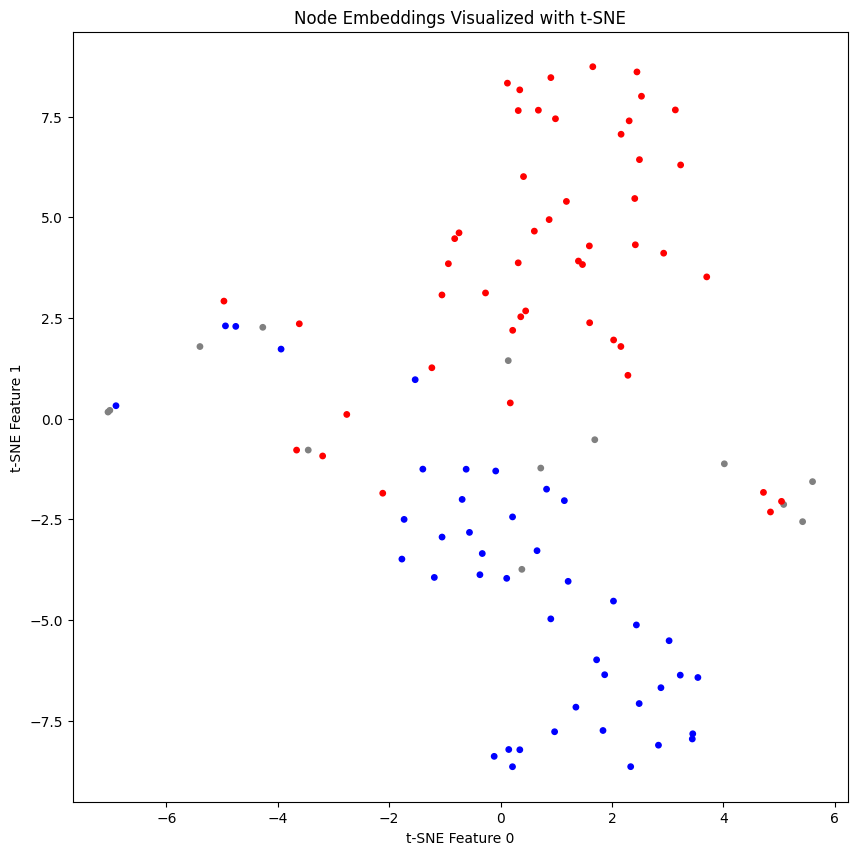

In [135]:
from sklearn.manifold import TSNE

# Convert to numpy for t-SNE
gnn_embeddings_np = gnn_embeddings.detach().cpu().numpy()

# Perform t-SNE embedding
tsne = TSNE(n_components=2, learning_rate='auto', init='random')
tsne_result = tsne.fit_transform(gnn_embeddings_np)

# Plot the result of t-SNE
plt.figure(figsize=(10, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=node_colors, cmap='viridis', s=15)
plt.title('Node Embeddings Visualized with t-SNE')
plt.xlabel('t-SNE Feature 0')
plt.ylabel('t-SNE Feature 1')
plt.show()


In [174]:
import numpy as np
import random

# Extract labels and handle neutral values
labels = []
for node, data in gml_graph.nodes(data=True):
    if data['value'] == 'c':
        labels.append('right')
    elif data['value'] == 'l':
        labels.append('left')
    else:  # Handle neutral and missing values
        labels.append('neutral')

labels = np.array(labels)

# Random seed for reproducibility
random.seed(52)

# Indices of all nodes
indices = list(range(len(labels)))

# Percentage of data to keep as labelled
labelled_percentage = 0.2  # e.g., 10% as labelled

# Select a subset of indices to remain labelled
labelled_indices = random.sample(indices, int(labelled_percentage * len(labels)))

# Initialize masks for labelled and unlabelled data
labelled_mask = np.zeros(len(labels), dtype=bool)
unlabelled_mask = np.ones(len(labels), dtype=bool)

# Update masks
labelled_mask[labelled_indices] = True
unlabelled_mask[labelled_indices] = False

# Use masks to split the dataset
labelled_labels = labels[labelled_mask]
unlabelled_labels = labels[unlabelled_mask]  # You won't use these labels during training

label_mapping = {'left': 0, 'right': 1, 'neutral': 2}
numeric_labels = np.array([label_mapping[label] for label in labels])



In [175]:
labelled_labels


array(['neutral', 'right', 'neutral', 'neutral', 'right', 'right',
       'right', 'right', 'left', 'right', 'right', 'right', 'right',
       'right', 'right', 'left', 'left', 'neutral', 'left', 'left',
       'left'], dtype='<U7')

In [176]:
labels

array(['neutral', 'right', 'right', 'right', 'neutral', 'right',
       'neutral', 'neutral', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'right', 'neutral', 'right',
       'right', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'neutral', 'right', 'left', 'left', 'right', 'right',
       'right', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'right', 'neutral', 'right',
       'neutral', 'right', 'right', 'neutral', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'left', 'left', 'left', 'left',
       'left', 'left', 'left', 'left', 'left', 'left', 'neutral', 'left',
       'left', 'left', 'left', 'left', 'left', 'neutral', 'right', 'left',
       'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left',
       'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left',
       'left', 'left', 'left', 'left', 'left', 'left', 'left', 'lef

In [177]:
label_mapping = {'left': 0, 'right': 1, 'neutral': 2}
numeric_labels = np.array([label_mapping[label] for label in labels])


# For GNN embeddings
X_train_gnn, y_train_gnn = gnn_embeddings[labelled_mask], numeric_labels[labelled_mask]

# For N2V embeddings
# Ensure node2vec embeddings are in the same order as labels
X_n2v = np.array([embeddings[str(node)] for node in gml_graph.nodes()])
X_train_n2v, y_train_n2v = X_n2v[labelled_mask], numeric_labels[labelled_mask]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Classifier for GNN embeddings
clf_gnn = RandomForestClassifier()
clf_gnn.fit(X_train_gnn, y_train_gnn)

# Classifier for N2V embeddings
clf_n2v = RandomForestClassifier()
clf_n2v.fit(X_train_n2v, y_train_n2v)

from sklearn.metrics import f1_score

# Predictions with GNN embeddings
y_pred_gnn = clf_gnn.predict(gnn_embeddings[unlabelled_mask])
# Evaluate GNN classifier
gnn_accuracy = accuracy_score(numeric_labels[unlabelled_mask], y_pred_gnn)
gnn_f1_score = f1_score(numeric_labels[unlabelled_mask], y_pred_gnn, average='weighted')

# Predictions with N2V embeddings
y_pred_n2v = clf_n2v.predict(X_n2v[unlabelled_mask])
# Evaluate N2V classifier
n2v_accuracy = accuracy_score(numeric_labels[unlabelled_mask], y_pred_n2v)
n2v_f1_score = f1_score(numeric_labels[unlabelled_mask], y_pred_n2v, average='weighted')

print(f"GNN Accuracy: {gnn_accuracy:.4f}")
print(f"GNN F1 Score: {gnn_f1_score:.4f}")
print(f"N2V Accuracy: {n2v_accuracy:.4f}")
print(f"N2V F1 Score: {n2v_f1_score:.4f}")


GNN Accuracy: 0.8333
GNN F1 Score: 0.8201
N2V Accuracy: 0.8452
N2V F1 Score: 0.8072


In [178]:
from sklearn.metrics import log_loss

def adjust_proba(y_pred_proba, all_classes):
    # Check if predicted probabilities cover all classes
    if y_pred_proba.shape[1] != len(all_classes):
        # Create a new array with a column for each class
        adjusted_proba = np.zeros((y_pred_proba.shape[0], len(all_classes)))
        # Fill in the probabilities for the classes that the classifier provided
        for idx, cls in enumerate(clf_gnn.classes_):  # Assuming clf_gnn.classes_ is in the order of the output probabilities
            class_idx = np.where(all_classes == cls)[0][0]
            adjusted_proba[:, class_idx] = y_pred_proba[:, idx]
        return adjusted_proba
    else:
        return y_pred_proba

# Adjust the predicted probabilities
y_pred_proba_gnn_adjusted = adjust_proba(y_pred_proba_gnn, all_classes)
y_pred_proba_n2v_adjusted = adjust_proba(y_pred_proba_n2v, all_classes)


from sklearn.metrics import log_loss

# Compute log loss using the adjusted probabilities
log_loss_gnn = log_loss(numeric_labels[unlabelled_mask], y_pred_proba_gnn_adjusted, labels=all_classes)
log_loss_n2v = log_loss(numeric_labels[unlabelled_mask], y_pred_proba_n2v_adjusted, labels=all_classes)

print(f"GNN Log Loss: {log_loss_gnn:.4f}")
print(f"N2V Log Loss: {log_loss_n2v:.4f}")



IndexError: index 2 is out of bounds for axis 1 with size 2

In [66]:
numeric_labels[unlabelled_mask]

array([2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2])

In [67]:
y_pred_proba_gnn

array([[0.65, 0.35],
       [0.59, 0.41],
       [0.65, 0.35],
       [0.49, 0.51],
       [0.72, 0.28],
       [0.65, 0.35],
       [0.58, 0.42],
       [0.69, 0.31],
       [0.16, 0.84],
       [0.22, 0.78],
       [0.43, 0.57],
       [0.28, 0.72],
       [0.12, 0.88],
       [0.31, 0.69],
       [0.48, 0.52],
       [0.46, 0.54],
       [0.24, 0.76],
       [0.25, 0.75],
       [0.38, 0.62],
       [0.33, 0.67],
       [0.34, 0.66],
       [0.33, 0.67],
       [0.19, 0.81],
       [0.25, 0.75],
       [0.23, 0.77],
       [0.13, 0.87],
       [0.78, 0.22],
       [0.55, 0.45],
       [0.84, 0.16],
       [0.7 , 0.3 ],
       [0.31, 0.69],
       [0.2 , 0.8 ],
       [0.34, 0.66],
       [0.14, 0.86],
       [0.19, 0.81],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.21, 0.79],
       [0.18, 0.82],
       [0.17, 0.83],
       [0.14, 0.86],
       [0.43, 0.57],
       [0.39, 0.61],
       [0.59, 0.41],
       [0.19, 0.81],
       [0.48, 0.52],
       [0.46, 0.54],
       [0.38,

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Classifier for GNN embeddings
clf_gnn = RandomForestClassifier()
clf_gnn.fit(X_train_gnn, y_train_gnn)

# Classifier for N2V embeddings
clf_n2v = RandomForestClassifier()
clf_n2v.fit(X_train_n2v, y_train_n2v)

# Predictions with GNN embeddings
y_pred_gnn = clf_gnn.predict(gnn_embeddings[unlabelled_mask])
# Evaluate GNN classifier
gnn_accuracy = accuracy_score(numeric_labels[unlabelled_mask], y_pred_gnn)

# Predictions with N2V embeddings
y_pred_n2v = clf_n2v.predict(X_n2v[unlabelled_mask])
# Evaluate N2V classifier
n2v_accuracy = accuracy_score(numeric_labels[unlabelled_mask], y_pred_n2v)

print(f"GNN Accuracy: {gnn_accuracy:.4f}")
print(f"N2V Accuracy: {n2v_accuracy:.4f}")


GNN Accuracy: 0.7684
N2V Accuracy: 0.8632


In [54]:
# Predictions with GNN embeddings
y_pred_gnn = clf_gnn.predict(gnn_embeddings[unlabelled_mask])
# Evaluate GNN classifier
gnn_accuracy = accuracy_score(numeric_labels[unlabelled_mask], y_pred_gnn)

# Predictions with N2V embeddings
y_pred_n2v = clf_n2v.predict(X_n2v[unlabelled_mask])
# Evaluate N2V classifier
n2v_accuracy = accuracy_score(numeric_labels[unlabelled_mask], y_pred_n2v)

print(f"GNN Accuracy: {gnn_accuracy:.4f}")
print(f"N2V Accuracy: {n2v_accuracy:.4f}")


GNN Accuracy: 0.7895
N2V Accuracy: 0.8632


In [52]:
X_train_n2v

array([[-2.85123676e-01, -2.83798665e-01,  7.76791275e-02,
        -7.28840604e-02, -2.46796489e-01, -3.37448388e-01,
         1.02743328e-01,  2.24019617e-01, -3.90170932e-01,
        -4.26384211e-02,  9.78086293e-02, -1.59852460e-01,
        -1.00939095e-01, -2.26278856e-01, -6.37895688e-02,
        -2.24667892e-01,  7.73035958e-02,  2.90561765e-01,
         1.98229402e-01, -2.00183466e-01,  3.87637705e-01,
         2.93151617e-01,  2.51519829e-02,  9.39041600e-02,
         3.06162328e-01, -3.66026536e-02, -2.74992645e-01,
         1.16882371e-02,  4.05932933e-01,  1.20438427e-01,
         7.06190765e-02,  1.20951319e-02,  1.00419089e-01,
         8.56085867e-02, -2.44740248e-01, -1.65839955e-01,
         1.02785595e-01,  1.28125355e-01,  1.47024781e-01,
         1.10108061e-02,  2.84024984e-01, -6.39700964e-02,
        -1.07337050e-01,  6.11204654e-02,  1.93462357e-01,
        -5.11193834e-02, -2.29281455e-01, -5.85020073e-02,
        -4.50706221e-02,  2.16490664e-02, -6.58438206e-0

In [179]:
# Convert NetworkX graph to a PyTorch Geometric Data object
data = from_networkx(gml_graph)

# Prepare the node features (using Node2Vec embeddings)
# node_features = torch.tensor(node_embeddings, dtype=torch.float)

# Add node features to data
# data.x = node_features

# Note: If you have no initial node features, you could alternatively initialize them randomly
data.x = torch.randn((data.num_nodes, 64), dtype=torch.float)

train_labels = torch.tensor(numeric_labels, dtype=torch.long)[labelled_mask]

# Assuming 'labelled_mask' is a boolean array indicating which nodes are labelled
data.train_mask = torch.tensor(labelled_mask, dtype=torch.bool)

In [242]:
# Define the number of input features and output classes
# num_features = data.num_features  # Assuming data.x contains the node features
# num_classes = 3  # Assuming you have 3 classes in your classification task

# Initialize the model
class SimpleGNN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

    def forward(self, x, edge_index):
        # First Graph Convolutional layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        
        # Second Graph Convolutional layer
        x = self.conv2(x, edge_index)
        
        return x, F.log_softmax(x, dim=1)

In [236]:
class SimpleGNN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)  # Add another GCN layer
        self.conv4 = GCNConv(hidden_channels, hidden_channels)  # Add another GCN layer

    def forward(self, x, edge_index):
        # First Graph Convolutional layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        
        # Second Graph Convolutional layer
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        
        # Third Graph Convolutional layer
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        
        # Fourth Graph Convolutional layer
        x = self.conv4(x, edge_index)
        
        return x, F.log_softmax(x, dim=1)


In [243]:
model = SimpleGNN(num_features=data.x.shape[1], hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [130]:
class SimpleGNN_2(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(SimpleGNN_2, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model = SimpleGNN_2(num_features=num_features, num_classes=num_classes)


In [127]:

# Convert NetworkX graph to a PyTorch Geometric Data object
data = from_networkx(gml_graph)

# Prepare the node features (using Node2Vec embeddings)
# node_features = torch.tensor(node_embeddings, dtype=torch.float)

# Add node features to data
# data.x = node_features

# Note: If you have no initial node features, you could alternatively initialize them randomly
data.x = torch.randn((data.num_nodes, 64), dtype=torch.float)

In [128]:
train_labels = torch.tensor(numeric_labels, dtype=torch.long)[labelled_mask]


In [87]:

# Convert NetworkX graph to a PyTorch Geometric Data object
data = from_networkx(gml_graph)

# Prepare the node features (using Node2Vec embeddings)
# node_features = torch.tensor(node_embeddings, dtype=torch.float)

# Add node features to data
# data.x = node_features

# Note: If you have no initial node features, you could alternatively initialize them randomly
data.x = torch.randn((data.num_nodes, 64), dtype=torch.float)

train_labels = torch.tensor(numeric_labels, dtype=torch.long)[labelled_mask]

# Assuming 'labelled_mask' is a boolean array indicating which nodes are labelled
data.train_mask = torch.tensor(labelled_mask, dtype=torch.bool)



for epoch in range(200):  # Number of epochs
    optimizer.zero_grad()
    # Pass both node features and edge_index to the model
    out = model(data.x, data.edge_index)
    # Apply the training mask to select only the outputs for the labelled nodes
    out_masked = out[data.train_mask]
    # Compute the loss using only the labelled nodes
    loss = loss_fn(out_masked, train_labels)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch {epoch}, Log Loss: {loss.item()}')


Epoch 0, Log Loss: 1.1412101984024048
Epoch 10, Log Loss: 1.2129484415054321
Epoch 20, Log Loss: 1.093088150024414
Epoch 30, Log Loss: 1.1514794826507568
Epoch 40, Log Loss: 1.1903069019317627
Epoch 50, Log Loss: 1.0672119855880737
Epoch 60, Log Loss: 1.1238747835159302
Epoch 70, Log Loss: 1.1207958459854126
Epoch 80, Log Loss: 1.1799652576446533
Epoch 90, Log Loss: 1.0949690341949463
Epoch 100, Log Loss: 1.0709973573684692
Epoch 110, Log Loss: 1.1177146434783936
Epoch 120, Log Loss: 1.1503299474716187
Epoch 130, Log Loss: 1.172168493270874
Epoch 140, Log Loss: 1.1497031450271606
Epoch 150, Log Loss: 1.0695151090621948
Epoch 160, Log Loss: 1.1579452753067017
Epoch 170, Log Loss: 1.1717767715454102
Epoch 180, Log Loss: 1.1495827436447144
Epoch 190, Log Loss: 1.1295549869537354


In [90]:
# Pass only the labeled nodes to the model for training
out = model(data.x, data.edge_index)[labelled_mask]

# Compute the loss using only the labeled nodes
loss = loss_fn(out, train_labels)

print(f'Training Log Loss: {loss.item()}')


Training Log Loss: 1.1067571640014648


In [91]:
# Pass the entire dataset through the model to obtain predicted probabilities for all nodes
with torch.no_grad():
    out = model(data.x, data.edge_index)
    # Convert the output into probabilities using softmax
    y_pred_proba_gnn = torch.softmax(out, dim=1).numpy()

# Adjust the predicted probabilities
y_pred_proba_gnn_adjusted = adjust_proba(y_pred_proba_gnn, all_classes)

# Compute log loss using the adjusted probabilities
log_loss_gnn = log_loss(numeric_labels[unlabelled_mask], y_pred_proba_gnn_adjusted, labels=all_classes)

print(f"GNN Log Loss: {log_loss_gnn:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [105, 95]

In [231]:
from sklearn.metrics import log_loss

# Convert NetworkX graph to a PyTorch Geometric Data object
data = from_networkx(gml_graph)

# Prepare the node features (using Node2Vec embeddings)
# node_features = torch.tensor(node_embeddings, dtype=torch.float)

# Add node features to data
# data.x = node_features

# Note: If you have no initial node features, you could alternatively initialize them randomly
data.x = torch.randn((data.num_nodes, 64), dtype=torch.float)

train_labels = torch.tensor(numeric_labels, dtype=torch.long)[labelled_mask]

# Assuming 'labelled_mask' is a boolean array indicating which nodes are labelled
data.train_mask = torch.tensor(labelled_mask, dtype=torch.bool)

# Initialize an empty array to store the predicted probabilities
y_pred_proba_gnn = []

for epoch in range(1):  # Number of epochs
    optimizer.zero_grad()
    # Pass both node features and edge_index to the model
    out = model(data.x, data.edge_index)
    # Apply the training mask to select only the outputs for the labelled nodes
    out_masked = out[data.train_mask]
    # Compute the loss using only the labelled nodes
    loss = loss_fn(out_masked, train_labels)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch {epoch}, Log Loss: {loss.item()}')

# Pass the entire dataset through the model to obtain predicted probabilities for all nodes
with torch.no_grad():
    out = model(data.x, data.edge_index)
    # Convert the output into probabilities using softmax
    y_pred_proba_gnn = torch.softmax(out, dim=1).numpy()

# Adjust the predicted probabilities
y_pred_proba_gnn_adjusted = adjust_proba(y_pred_proba_gnn, all_classes)

# Compute log loss using the adjusted probabilities
log_loss_gnn = log_loss(numeric_labels[unlabelled_mask], y_pred_proba_gnn_adjusted, labels=all_classes)

print(f"GNN Log Loss: {log_loss_gnn:.4f}")


TypeError: only integer tensors of a single element can be converted to an index

In [244]:
from sklearn.metrics import log_loss

# Convert NetworkX graph to a PyTorch Geometric Data object
data = from_networkx(gml_graph)

# Prepare the node features (using Node2Vec embeddings)
node_features = torch.tensor(node_embeddings, dtype=torch.float)

# Add node features to data
data.x = node_features

# Note: If you have no initial node features, you could alternatively initialize them randomly
# data.x = torch.randn((data.num_nodes, 64), dtype=torch.float)

train_labels = torch.tensor(numeric_labels, dtype=torch.long)[labelled_mask]

# Assuming 'labelled_mask' is a boolean array indicating which nodes are labelled
data.train_mask = torch.tensor(labelled_mask, dtype=torch.bool)

# Initialize an empty array to store the predicted probabilities
y_pred_proba_gnn = []

for epoch in range(2000):  # Number of epochs
    optimizer.zero_grad()
    # Pass both node features and edge_index to the model
    _, out = model(data.x, data.edge_index)
    # Apply the training mask to select only the outputs for the labelled nodes
    out_masked = out[data.train_mask]
    # Compute the loss using only the labelled nodes
    loss = loss_fn(out_masked, train_labels)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch {epoch}, Log Loss: {loss.item()}')

# Pass the entire dataset through the model to obtain predicted probabilities for all nodes
with torch.no_grad():
    _,out = model(data.x, data.edge_index)
    # Convert the output into probabilities using softmax
    y_pred_proba_gnn = torch.softmax(out, dim=1).numpy()

# Adjust the predicted probabilities
y_pred_proba_gnn_adjusted = adjust_proba(y_pred_proba_gnn, all_classes)

# Apply the unlabelled mask to select only the predicted probabilities for unlabelled nodes
y_pred_proba_gnn_unlabelled = y_pred_proba_gnn_adjusted[unlabelled_mask]

# Compute log loss using the adjusted probabilities
log_loss_gnn = log_loss(numeric_labels[unlabelled_mask], y_pred_proba_gnn_unlabelled, labels=all_classes)

print(f"GNN Log Loss: {log_loss_gnn:.4f}")

from sklearn.metrics import f1_score

# Convert predicted probabilities to predicted labels
y_pred_gnn = np.argmax(y_pred_proba_gnn_unlabelled, axis=1)

# Compute F1 score
f1_gnn = f1_score(numeric_labels[unlabelled_mask], y_pred_gnn, average='weighted')

print(f"GNN F1 Score: {f1_gnn:.4f}")

from sklearn.metrics import accuracy_score

# Get predicted labels by selecting the class with the highest probability for each node
y_pred_labels_gnn = np.argmax(y_pred_proba_gnn_unlabelled, axis=1)

# Calculate accuracy
accuracy_gnn = accuracy_score(numeric_labels[unlabelled_mask], y_pred_labels_gnn)

print(f"GNN Accuracy: {accuracy_gnn:.4f}")


Epoch 0, Log Loss: 4.1129889488220215
Epoch 10, Log Loss: 0.9563036561012268
Epoch 20, Log Loss: 0.6337534785270691
Epoch 30, Log Loss: 0.4769859313964844
Epoch 40, Log Loss: 0.37155911326408386
Epoch 50, Log Loss: 0.28497862815856934
Epoch 60, Log Loss: 0.2392943650484085
Epoch 70, Log Loss: 0.2746385335922241
Epoch 80, Log Loss: 0.22738061845302582
Epoch 90, Log Loss: 0.24934405088424683
Epoch 100, Log Loss: 0.14406029880046844
Epoch 110, Log Loss: 0.17436398565769196
Epoch 120, Log Loss: 0.18268783390522003
Epoch 130, Log Loss: 0.21125467121601105
Epoch 140, Log Loss: 0.19072583317756653
Epoch 150, Log Loss: 0.23013626039028168
Epoch 160, Log Loss: 0.19616076350212097
Epoch 170, Log Loss: 0.21315912902355194
Epoch 180, Log Loss: 0.12073861807584763
Epoch 190, Log Loss: 0.1679350882768631
Epoch 200, Log Loss: 0.17069849371910095
Epoch 210, Log Loss: 0.17136089503765106
Epoch 220, Log Loss: 0.13943429291248322
Epoch 230, Log Loss: 0.13033123314380646
Epoch 240, Log Loss: 0.16116683185

In [228]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define the learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
patience=50
best_loss = float('inf')
best_epoch = 0


for epoch in range(2000):  # Number of epochs
    optimizer.zero_grad()
    # Pass both node features and edge_index to the model
    _, out = model(data.x, data.edge_index)
    # Apply the training mask to select only the outputs for the labelled nodes
    out_masked = out[data.train_mask]
    # Compute the loss using only the labelled nodes
    loss = loss_fn(out_masked, train_labels)
    loss.backward()
    optimizer.step()

    # Update learning rate scheduler
    scheduler.step(loss)

    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch {epoch}, Log Loss: {loss.item()}')

    # Check for early stopping based on validation loss (not implemented here)
    if loss < best_loss:
        best_loss = loss
        best_epoch = epoch
    elif epoch - best_epoch > patience:  # Patience is the number of epochs to wait before early stopping
        print("Early stopping triggered.")
        break

        # Convert predicted probabilities to predicted labels
y_pred_gnn = np.argmax(y_pred_proba_gnn_unlabelled, axis=1)

# Compute F1 score
f1_gnn = f1_score(numeric_labels[unlabelled_mask], y_pred_gnn, average='weighted')

print(f"GNN F1 Score: {f1_gnn:.4f}")


# Get predicted labels by selecting the class with the highest probability for each node
y_pred_labels_gnn = np.argmax(y_pred_proba_gnn_unlabelled, axis=1)

# Calculate accuracy
accuracy_gnn = accuracy_score(numeric_labels[unlabelled_mask], y_pred_labels_gnn)

print(f"GNN Accuracy: {accuracy_gnn:.4f}")

Epoch 0, Log Loss: 4.138560771942139
Epoch 10, Log Loss: 1.3095579147338867
Epoch 20, Log Loss: 0.6217630505561829
Epoch 30, Log Loss: 0.527499258518219
Epoch 40, Log Loss: 0.3385542631149292
Epoch 50, Log Loss: 0.2844679355621338
Epoch 00058: reducing learning rate of group 0 to 1.0000e-03.
Epoch 60, Log Loss: 0.30949997901916504
Epoch 70, Log Loss: 0.2156471461057663
Epoch 00074: reducing learning rate of group 0 to 1.0000e-04.
Epoch 80, Log Loss: 0.25191739201545715
Epoch 00090: reducing learning rate of group 0 to 1.0000e-05.
Epoch 90, Log Loss: 0.27079036831855774
Epoch 100, Log Loss: 0.2581365704536438
Epoch 00106: reducing learning rate of group 0 to 1.0000e-06.
Epoch 110, Log Loss: 0.21182042360305786
Epoch 00117: reducing learning rate of group 0 to 1.0000e-07.
Epoch 120, Log Loss: 0.2420976758003235
Epoch 130, Log Loss: 0.3102822005748749
Epoch 00138: reducing learning rate of group 0 to 1.0000e-08.
Epoch 140, Log Loss: 0.26823920011520386
Epoch 150, Log Loss: 0.1960993260145

In [206]:
from sklearn.metrics import log_loss

# Convert NetworkX graph to a PyTorch Geometric Data object
data = from_networkx(gml_graph)

# Prepare the node features (using Node2Vec embeddings)
# node_features = torch.tensor(node_embeddings, dtype=torch.float)

# Add node features to data
# data.x = node_features

# Note: If you have no initial node features, you could alternatively initialize them randomly
data.x = torch.randn((data.num_nodes, 64), dtype=torch.float)

train_labels = torch.tensor(numeric_labels, dtype=torch.long)[labelled_mask]

# Assuming 'labelled_mask' is a boolean array indicating which nodes are labelled
data.train_mask = torch.tensor(labelled_mask, dtype=torch.bool)

# Initialize an empty array to store the predicted probabilities
y_pred_proba_gnn = []

for epoch in range(3000):  # Number of epochs
    optimizer.zero_grad()
    # Pass both node features and edge_index to the model
    _, out = model(data.x, data.edge_index)
    # Apply the training mask to select only the outputs for the labelled nodes
    out_masked = out[data.train_mask]
    # Compute the loss using only the labelled nodes
    loss = loss_fn(out_masked, train_labels)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch {epoch}, Log Loss: {loss.item()}')

# Pass the entire dataset through the model to obtain predicted probabilities for all nodes
with torch.no_grad():
    _,out = model(data.x, data.edge_index)
    # Convert the output into probabilities using softmax
    y_pred_proba_gnn = torch.softmax(out, dim=1).numpy()

# Adjust the predicted probabilities
y_pred_proba_gnn_adjusted = adjust_proba(y_pred_proba_gnn, all_classes)

# Apply the unlabelled mask to select only the predicted probabilities for unlabelled nodes
y_pred_proba_gnn_unlabelled = y_pred_proba_gnn_adjusted[unlabelled_mask]

# Compute log loss using the adjusted probabilities
log_loss_gnn = log_loss(numeric_labels[unlabelled_mask], y_pred_proba_gnn_unlabelled, labels=all_classes)

print(f"GNN Log Loss: {log_loss_gnn:.4f}")

from sklearn.metrics import f1_score

# Convert predicted probabilities to predicted labels
y_pred_gnn = np.argmax(y_pred_proba_gnn_unlabelled, axis=1)

# Compute F1 score
f1_gnn = f1_score(numeric_labels[unlabelled_mask], y_pred_gnn, average='weighted')

print(f"GNN F1 Score: {f1_gnn:.4f}")

from sklearn.metrics import accuracy_score

# Get predicted labels by selecting the class with the highest probability for each node
y_pred_labels_gnn = np.argmax(y_pred_proba_gnn_unlabelled, axis=1)

# Calculate accuracy
accuracy_gnn = accuracy_score(numeric_labels[unlabelled_mask], y_pred_labels_gnn)

print(f"GNN Accuracy: {accuracy_gnn:.4f}")


Epoch 0, Log Loss: 4.311534404754639
Epoch 10, Log Loss: 4.253147602081299
Epoch 20, Log Loss: 4.28554105758667
Epoch 30, Log Loss: 4.2843451499938965
Epoch 40, Log Loss: 4.288405418395996
Epoch 50, Log Loss: 4.2847514152526855
Epoch 60, Log Loss: 4.276110649108887
Epoch 70, Log Loss: 4.293677806854248
Epoch 80, Log Loss: 4.2903032302856445
Epoch 90, Log Loss: 4.276805877685547
Epoch 100, Log Loss: 4.261570453643799
Epoch 110, Log Loss: 4.245781898498535
Epoch 120, Log Loss: 4.250293254852295
Epoch 130, Log Loss: 4.301053524017334
Epoch 140, Log Loss: 4.285628318786621
Epoch 150, Log Loss: 4.240128040313721
Epoch 160, Log Loss: 4.281398296356201
Epoch 170, Log Loss: 4.2729363441467285
Epoch 180, Log Loss: 4.286385536193848
Epoch 190, Log Loss: 4.248828887939453
Epoch 200, Log Loss: 4.282958030700684
Epoch 210, Log Loss: 4.2422566413879395
Epoch 220, Log Loss: 4.264884948730469
Epoch 230, Log Loss: 4.32269811630249
Epoch 240, Log Loss: 4.288509368896484
Epoch 250, Log Loss: 4.2729792594

In [183]:
from sklearn.metrics import f1_score

# Convert predicted probabilities to predicted labels
y_pred_gnn = np.argmax(y_pred_proba_gnn_unlabelled, axis=1)

# Compute F1 score
f1_gnn = f1_score(numeric_labels[unlabelled_mask], y_pred_gnn, average='weighted')

print(f"GNN F1 Score: {f1_gnn:.4f}")

from sklearn.metrics import accuracy_score

# Get predicted labels by selecting the class with the highest probability for each node
y_pred_labels_gnn = np.argmax(y_pred_proba_gnn_unlabelled, axis=1)

# Calculate accuracy
accuracy_gnn = accuracy_score(numeric_labels[unlabelled_mask], y_pred_labels_gnn)

print(f"GNN Accuracy: {accuracy_gnn:.4f}")



GNN F1 Score: 0.2906
GNN Accuracy: 0.3452


In [184]:
all_classes

[0, 1, 2]

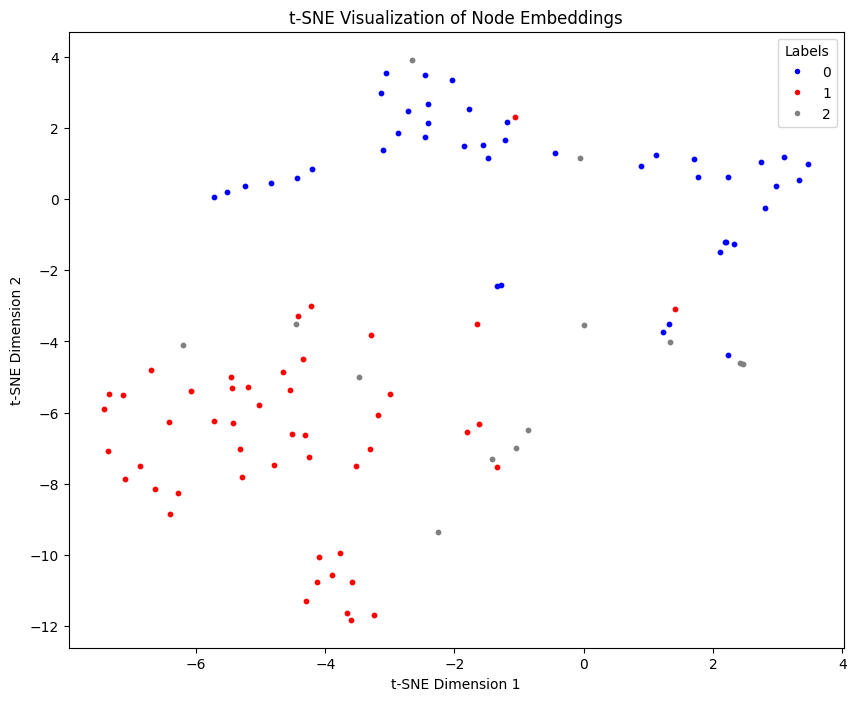

In [203]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'model' is your trained GNN model
# Assuming 'data' contains your input graph data
# Assuming 'numeric_labels' contains the numeric labels

# Set model to evaluation mode
model.eval()

# Pass the entire dataset through the model to obtain node embeddings
with torch.no_grad():
    out,_ = model(data.x, data.edge_index)

# Extract embeddings from the output of the GNN model
node_embeddings = out.numpy()

# Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(node_embeddings)

# Define colors for different labels
label_colors = {0: 'blue', 1: 'red', 2: 'grey'}

# Plot the embeddings with colored points based on true labels
plt.figure(figsize=(10, 8))
for i in range(len(embeddings_2d)):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=label_colors[numeric_labels[i]], s=10)  # Adjust 's' for point size
plt.title('t-SNE Visualization of Node Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=label) for label, color in label_colors.items()]
plt.legend(handles=handles, title='Labels', loc='best')

plt.show()


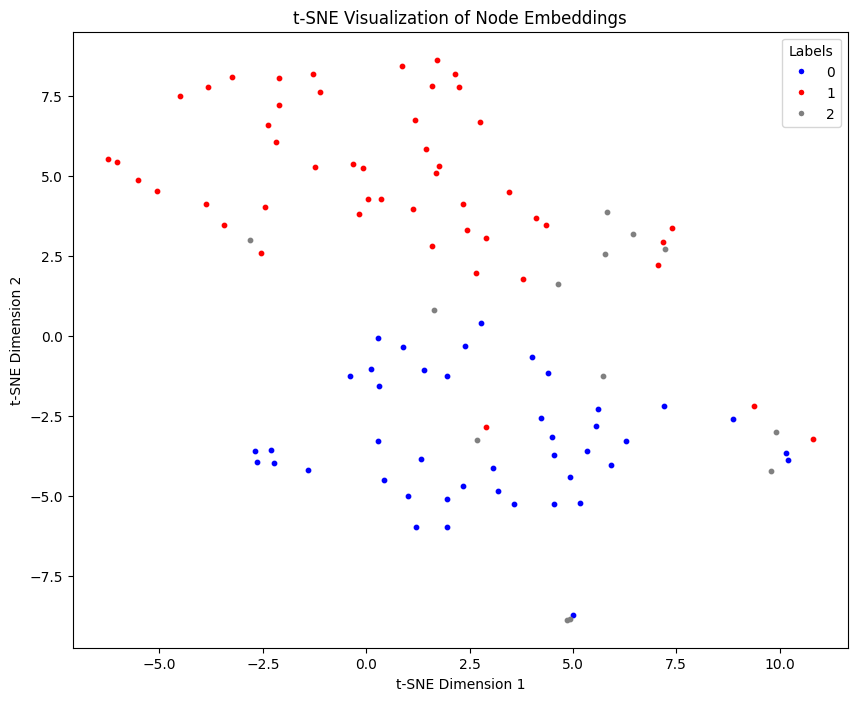

In [207]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'model' is your trained GNN model
# Assuming 'data' contains your input graph data
# Assuming 'numeric_labels' contains the numeric labels

# Set model to evaluation mode
model.eval()

# Pass the entire dataset through the model to obtain node embeddings
with torch.no_grad():
    out,_ = model(data.x, data.edge_index)

# Extract embeddings from the output of the GNN model
node_embeddings = out.numpy()

# Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(node_embeddings)

# Define colors for different labels
label_colors = {0: 'blue', 1: 'red', 2: 'grey'}

# Plot the embeddings with colored points based on true labels
plt.figure(figsize=(10, 8))
for i in range(len(embeddings_2d)):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=label_colors[numeric_labels[i]], s=10)  # Adjust 's' for point size
plt.title('t-SNE Visualization of Node Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=label) for label, color in label_colors.items()]
plt.legend(handles=handles, title='Labels', loc='best')

plt.show()


In [192]:
# Create a simple graph with 5 nodes and labels
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (3, 4)])
labels = np.array(['A', 'B', 'C', 'D', 'E'])  # Node labels

In [194]:
class SimpleGNN_test(torch.nn.Module):
    def __init__(self):
        super(SimpleGNN_test, self).__init__()
        self.conv1 = GCNConv(1, 2)  # Assuming 1-dimensional features, outputting 2-dimensional embeddings

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        return x

# Convert to PyTorch Geometric Data
data = from_networkx(G)
data.x = torch.ones(data.num_nodes, 1)  # Dummy features

# Initialize and apply GNN
model = SimpleGNN_test()
with torch.no_grad():
    gnn_embeddings = model(data).numpy()

print("GNN Embeddings aligned with node order:\n", gnn_embeddings)


GNN Embeddings aligned with node order:
 [[-0.712854   0.6320981]
 [-0.712854   0.6320981]
 [-0.712854   0.6320981]
 [-0.712854   0.632098 ]
 [-0.712854   0.632098 ]]


In [195]:
node2vec = Node2Vec(G, dimensions=2, walk_length=10, num_walks=5, workers=1)
model = node2vec.fit(window=2)
n2v_embeddings = np.array([model.wv[str(i)] for i in range(len(G))])

print("Node2Vec Embeddings (need alignment):\n", n2v_embeddings)

Generating walks (CPU: 1): 100%|████████████████| 5/5 [00:00<00:00, 4532.42it/s]

Node2Vec Embeddings (need alignment):
 [[-0.25236788 -0.1838636 ]
 [-0.02521988  0.0194522 ]
 [ 0.2552317   0.45418254]
 [ 0.3216307   0.44835714]
 [-0.4669228  -0.35699078]]


In [196]:
# For GNN, embeddings are already aligned with labels
print("GNN Labels aligned:", labels)

# For Node2Vec, demonstrate the need for alignment
aligned_labels = np.array([labels[int(node)] for node in model.wv.index_to_key])
print("Node2Vec Labels after alignment:", aligned_labels)

GNN Labels aligned: ['A' 'B' 'C' 'D' 'E']
Node2Vec Labels after alignment: ['B' 'C' 'E' 'D' 'A']


In [197]:
model.wv.index_to_key

['1', '2', '4', '3', '0']

In [198]:
str[0]

TypeError: 'type' object is not subscriptable